# Data analysis project tutorial 
## Economic data analysis with Python and Pandas
From a tutorial by Rob Mulla exploring different datasets from Fred API

In [1]:
%pip install fredapi > /dev/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from secret import fred_secret 

#Choose a theme for the plots
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
#Get the colors of the plots from the theme
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
#import the api for the data
from fredapi import Fred

#fred api key - remove it to put on github
fred_key = fred_secret

# 1. Create the Fred object

In [3]:
#Create fred object and provie api key, used to pull down all the data
fred = Fred(api_key=fred_key)

# 2. Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.shape

(1000, 15)

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-28,2023-09-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 09:06:08-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-09-28,2023-09-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-09-28,2023-09-28,S&P 500,2013-09-30,2023-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-27 19:11:01-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-09-28,2023-09-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-09-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 09:06:12-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-09-28,2023-09-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...


# 3. Pull raw data & plot

<Axes: title={'center': 'S&P 500'}>

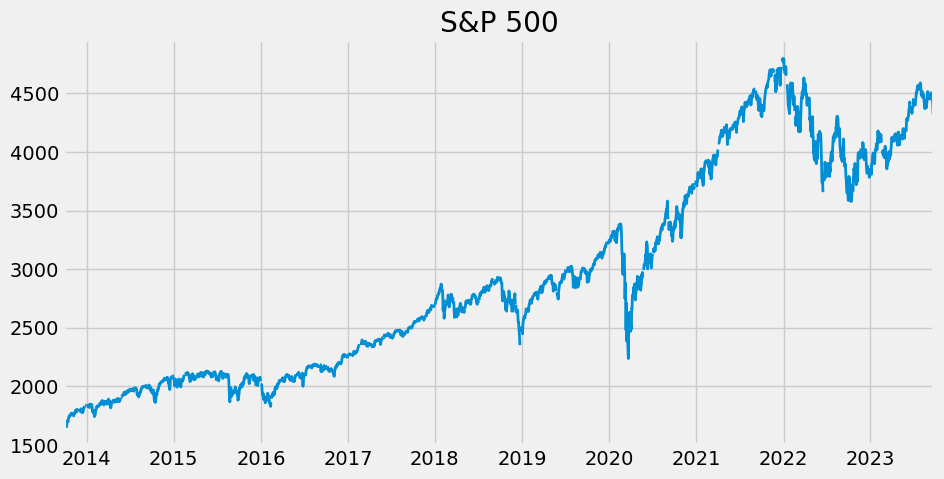

In [7]:
sp500 = fred.get_series(series_id='SP500')
#Plot the data with sizes of the figure, the title and line width
sp500.plot(figsize=(10 , 5), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [12]:
umemp_results = fred.search('unemployment')

In [13]:
umemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,56,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-09-28,2023-09-28,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-09-28,2023-09-28,Continued Claims (Insured Unemployment),1967-01-07,2023-09-09,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-09-21 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-09-28,2023-09-28,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,65,"Starting with the July, 2021 report: An Update..."


In [14]:
fred.get_series_info('UNRATE')

id                                                                      UNRATE
realtime_start                                                      2023-09-28
realtime_end                                                        2023-09-28
title                                                        Unemployment Rate
observation_start                                                   1948-01-01
observation_end                                                     2023-08-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                                  Percent
units_short                                                                  %
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [16]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
Length: 908, dtype: float64

<Axes: title={'center': 'Unemployment Rate'}>

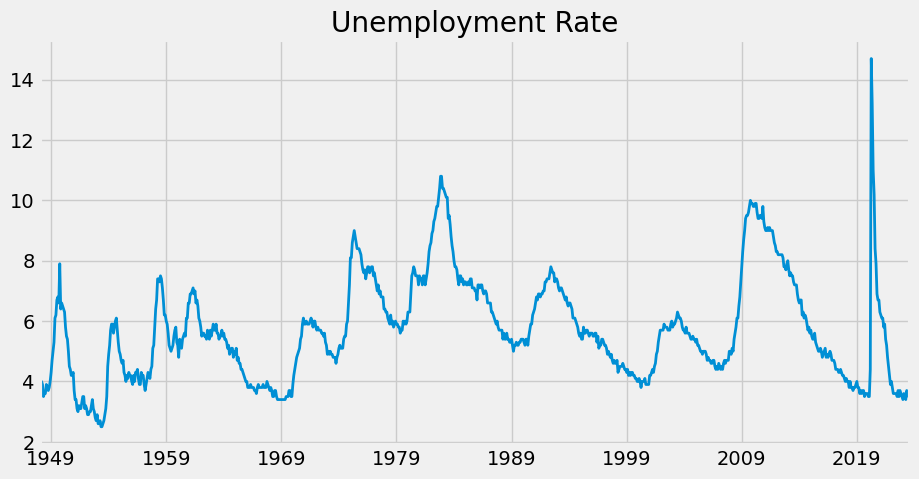

In [17]:
unrate.plot(figsize=(10 , 5), title='Unemployment Rate', lw=2)

In [27]:
fred.search('unemployment state', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,56,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-09-28,2023-09-28,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,70,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2023-09-28,2023-09-28,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2023-09-01 07:45:58-05:00,20,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-09-28,2023-09-28,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,68,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAAMHE9URN,VAAMHE9URN,2023-09-28,2023-09-28,"Unemployment Rate in Amherst County, VA",1990-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 10:16:13-05:00,1,These data come from the Current Population Su...
MIDL248UR,MIDL248UR,2023-09-28,2023-09-28,"Unemployment Rate in Midland, TX (MSA)",1990-01-01,2023-08-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-09-27 13:31:26-05:00,1,None
FAYE137UR,FAYE137UR,2023-09-28,2023-09-28,"Unemployment Rate in Fayetteville, NC (MSA)",1990-01-01,2023-08-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-09-27 13:31:19-05:00,1,None


In [31]:
midl = fred.get_series('MIDL248UR')

<Axes: title={'center': 'Michigan Unemployment Rate'}>

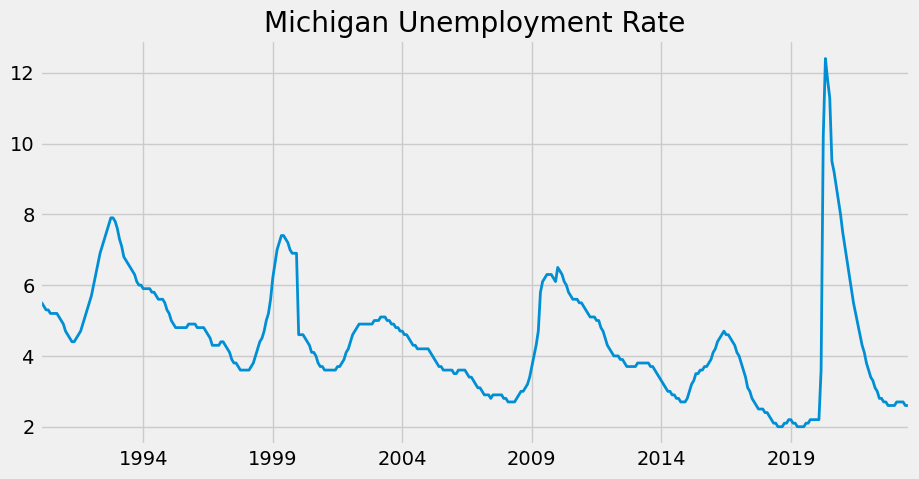

In [32]:
midl.plot(figsize=(10 , 5), title='Michigan Unemployment Rate', lw=2)